情報理工学院・情報工学系

18M30841

鄭 志豪

problem2-1: Proximal Gradient method

[[0.90909091]
 [1.54545455]]


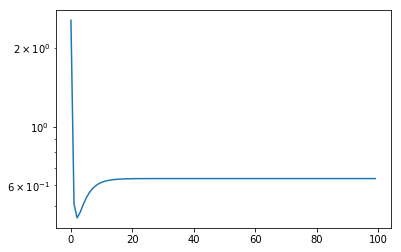

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

ramuda = 1
A = np.mat([[3,0.5], [0.5,1]])
w = np.mat([[3], [-1]])
myu = np.array([[1], [2]])
Lipsitz = np.max(np.linalg.eigvals(2 * A))

def f(A, w, myu, ramuda):
  return (np.dot(np.dot((w - myu).T, A), (w - myu)) + ramuda * np.linalg.norm(w, 1))[0, 0]

def grad(A, w, myu):
  return 2 * np.dot(A, (w - myu))

def soft_thresh(update, threshold):
  return np.multiply(np.sign(update), np.maximum(0, np.abs(update) - threshold))

if __name__ == '__main__':
  J_list = []
  W = []

  for i in range(100):
    J_list.append(f(A, w, myu, ramuda))
    W.append((w[0, 0], w[1, 0]))
    w = soft_thresh(w - grad(A, w, myu) / Lipsitz, ramuda / Lipsitz)
  print(w)

  res = []
  for element in W:
    res.append(np.linalg.norm((element[0] - w[0,0], element[0] - w[1,0])))

  plt.yscale('log') 
  plt.plot(res)
  plt.show()


problem2-2: Accelerated Proximal Gradient method

λ = 2

[[0.81818182]
 [1.09090909]]


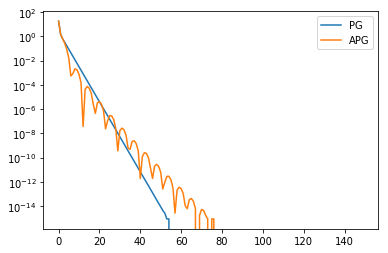

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

ramuda = 2
A = np.mat([[3,0.5], [0.5,1]])
w = np.mat([[3], [-1]])
myu = np.array([[1], [2]])
Lipsitz = np.max(np.linalg.eigvals(2 * A))

def f(A, w, myu, ramuda):
  return (np.dot(np.dot((w - myu).T, A), (w - myu)) + ramuda * np.linalg.norm(w, 1))[0, 0]

def grad(A, w, myu):
  return 2 * np.dot(A, (w - myu))

def soft_thresh(update, threshold):
  return np.multiply(np.sign(update), np.maximum(0, np.abs(update) - threshold))

def q(t):
  return (t - 1) / (t + 2)

if __name__ == '__main__':
  J_list = []
  W = []
  J_list_APG = []
  
  # PG method
  for i in range(100):
    J_list.append(f(A, w, myu, ramuda))
    W.append((w[0, 0], w[1, 0]))
    w = soft_thresh(w - grad(A, w, myu) / Lipsitz, ramuda / Lipsitz)
  J = f(A, w, myu, ramuda)
  res = []
  for element in W:
    res.append(np.linalg.norm((element[0] - w[0,0], element[0] - w[1,0])))
  
  # APG method
  w = np.mat([[3],[-1]])
  J_list_APG.append(f(A, w, myu, ramuda))
  w_pre = w
  w = soft_thresh(w-grad(A,w_pre,myu)/Lipsitz, ramuda / Lipsitz)
  for i in range(1, 150):
    v = w + q(i) * (w - w_pre)
    w_pre = w
    J_list_APG.append(f(A, w, myu, ramuda))
    w = soft_thresh(v-grad(A, v, myu) / Lipsitz, ramuda / Lipsitz)
  J_APG = f(A, w, myu, ramuda)
  print(w)

  # compare with AG in problem2-1
  plt.yscale('log') 
  plt.plot(J_list - J)
  plt.plot(J_list_APG - J_APG)
  plt.legend(['PG', 'APG'])
  plt.show()

In [0]:
λ = 4

[[0.63636364]
 [0.18181818]]


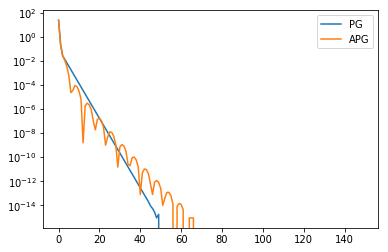

In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

ramuda = 4
A = np.mat([[3,0.5], [0.5,1]])
w = np.mat([[3], [-1]])
myu = np.array([[1], [2]])
Lipsitz = np.max(np.linalg.eigvals(2 * A))

def f(A, w, myu, ramuda):
  return (np.dot(np.dot((w - myu).T, A), (w - myu)) + ramuda * np.linalg.norm(w, 1))[0, 0]

def grad(A, w, myu):
  return 2 * np.dot(A, (w - myu))

def soft_thresh(update, threshold):
  return np.multiply(np.sign(update), np.maximum(0, np.abs(update) - threshold))

def q(t):
  return (t - 1) / (t + 2)

if __name__ == '__main__':
  J_list = []
  W = []
  J_list_APG = []
  
  # PG method
  for i in range(100):
    J_list.append(f(A, w, myu, ramuda))
    W.append((w[0, 0], w[1, 0]))
    w = soft_thresh(w - grad(A, w, myu) / Lipsitz, ramuda / Lipsitz)
  J = f(A, w, myu, ramuda)
  res = []
  for element in W:
    res.append(np.linalg.norm((element[0] - w[0,0], element[0] - w[1,0])))
  
  # APG method
  w = np.mat([[3],[-1]])
  J_list_APG.append(f(A, w, myu, ramuda))
  w_pre = w
  w = soft_thresh(w-grad(A,w_pre,myu)/Lipsitz, ramuda / Lipsitz)
  for i in range(1, 150):
    v = w + q(i) * (w - w_pre)
    w_pre = w
    J_list_APG.append(f(A, w, myu, ramuda))
    w = soft_thresh(v-grad(A, v, myu) / Lipsitz, ramuda / Lipsitz)
  J_APG = f(A, w, myu, ramuda)
  print(w)

  # compare with AG in problem2-1
  plt.yscale('log') 
  plt.plot(J_list - J)
  plt.plot(J_list_APG - J_APG)
  plt.legend(['PG', 'APG'])
  plt.show()

λ = 6

[[0.33333333]
 [0.        ]]


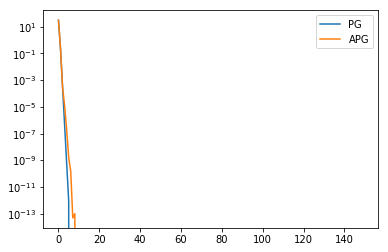

In [5]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

ramuda = 6
A = np.mat([[3,0.5], [0.5,1]])
w = np.mat([[3], [-1]])
myu = np.array([[1], [2]])
Lipsitz = np.max(np.linalg.eigvals(2 * A))

def f(A, w, myu, ramuda):
  return (np.dot(np.dot((w - myu).T, A), (w - myu)) + ramuda * np.linalg.norm(w, 1))[0, 0]

def grad(A, w, myu):
  return 2 * np.dot(A, (w - myu))

def soft_thresh(update, threshold):
  return np.multiply(np.sign(update), np.maximum(0, np.abs(update) - threshold))

def q(t):
  return (t - 1) / (t + 2)

if __name__ == '__main__':
  J_list = []
  W = []
  J_list_APG = []
  
  # PG method
  for i in range(100):
    J_list.append(f(A, w, myu, ramuda))
    W.append((w[0, 0], w[1, 0]))
    w = soft_thresh(w - grad(A, w, myu) / Lipsitz, ramuda / Lipsitz)
  J = f(A, w, myu, ramuda)
  res = []
  for element in W:
    res.append(np.linalg.norm((element[0] - w[0,0], element[0] - w[1,0])))
  
  # APG method
  w = np.mat([[3],[-1]])
  J_list_APG.append(f(A, w, myu, ramuda))
  w_pre = w
  w = soft_thresh(w-grad(A,w_pre,myu)/Lipsitz, ramuda / Lipsitz)
  for i in range(1, 150):
    v = w + q(i) * (w - w_pre)
    w_pre = w
    J_list_APG.append(f(A, w, myu, ramuda))
    w = soft_thresh(v-grad(A, v, myu) / Lipsitz, ramuda / Lipsitz)
  J_APG = f(A, w, myu, ramuda)
  print(w)

  # compare with AG in problem2-1
  plt.yscale('log') 
  plt.plot(J_list - J)
  plt.plot(J_list_APG - J_APG)
  plt.legend(['PG', 'APG'])
  plt.show()